# Python dependencies
Required python dependencies:
- rpy2
- pandas

In [13]:
!pip3 uninstall rpy2 -y
!pip3 install rpy2==3.5.1
#!pip3 uninstall pandas
#!pip3 install pandas==1.5.3

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-py3-none-any.whl


In [14]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
# Create df
import pandas as pd
import rpy2.robjects as robjects
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
#robjects.globalenv['df'] = df
df.head()

,cups_of_coffee,productivity
0,0,2
1,1,5
2,2,6
3,3,8
4,4,9


In [16]:
# GLOBAL VARIABLES
FILE_TO_ANALYZE = 'bgloct_1'

In [17]:
# Phase 1: Execute cwinAnalysis on file to analyze
filename="bgloct_1"
!python ./ffdatools/cwinAnalysis.py ./ffdatools/$filename $filename


INFO: assessing the tuple count wrt to CWIN ...
INFO: DONE! results in ./counts/tcount-bgloct_1.txt



d:\Universita\Corsi\DataScience\DataScience_2022-23\Esercitazioni\Homeworks\.venv\lib\site-packages\rpy2\robjects\pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


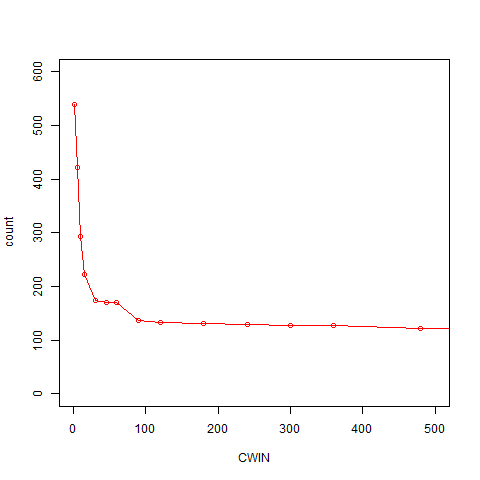

In [18]:
%%R -i df

# NB: HERE CONSTANTS
FILE_NAME <- "bgloct_1"

CURRDIR <- getwd()
FFDATOOLS <- paste(CURRDIR, '/ffdatools', sep='')
FILE <- paste(CURRDIR,"/counts/tcount-",FILE_NAME,".txt",sep="", collapse=NULL)
dataset <- read.delim(FILE, header=FALSE)
plot ( dataset$V1, dataset$V2, col="red", xlim=c(0,500), ylim=c(0,600), type="ol",
       xlab="CWIN", ylab="count")



Da questo grafico vediamo che un buon CWIN potrebbe essere proprio CWIN=100.<br>
Proviamo a lanciare lo script **logCoalescence** proprio con questo parametro

In [19]:
# logCoalescence
!python ffdatools/logCoalescence.py ./ffdatools/$filename 100


Fix:
        remove dir tuples-./ffdatools/bgloct_1-100



In [20]:
%%R
# Analyze interarrivals
interarrivals <- read.table(paste(CURRDIR,"/tuples-/ffdatools/",FILE_NAME,"-100/interarrivals.txt",sep=""), quote="\"", comment.char="")
interarrivals

        V1
1    19389
2    77315
3     2068
4    11776
5    67258
6    10150
7    82345
8     5689
9    17135
10   44715
11    1081
12   24123
13    5458
14    4418
15    6157
16   47001
17    6522
18   16857
19   19914
20   61004
21   16776
22   28641
23   46370
24    6322
25     828
26   42425
27   10703
28   12793
29     406
30   26632
31   30175
32   17837
33     969
34    7928
35     115
36     116
37     115
38    1778
39   16349
40  126877
41     397
42   52760
43   14834
44     647
45   23354
46   14747
47    3144
48    7069
49    7654
50     438
51   21538
52    1454
53   42846
54     284
55    1987
56    3657
57     469
58    1152
59    1109
60    1415
61     851
62     561
63   90571
64   24162
65    2388
66   81575
67    1079
68    2610
69    2302
70   39850
71     788
72   73881
73   15593
74    5727
75    2949
76   87449
77     155
78    1070
79    4242
80    4162
81    6492
82     865
83   25414
84   44661
85   75314
86    7267
87   16838
88    2109
89     320
90     428

In [21]:
%%R
library(fmsb)

# Compute mean
mean <- mean(interarrivals$V1)
mean


[1] 19696.52


In [22]:
%%R
# Compute sd
sd <- sd(interarrivals$V1)
sd


[1] 25623.61


In [23]:
%%R
# Compute Median
median <- median(interarrivals$V1)
median

[1] 8835


In [24]:
%%R
# Compute SIQR
siqr <- SIQR(interarrivals$V1)
siqr

[1] 12261.5


## R cell example

In [25]:
%%R -i df -w 5 -h 5
# import df from global environment (-i df)
# make default figure size 5 by 5 inches with 200 dpi resolution
df

  cups_of_coffee productivity
0              0            2
1              1            5
2              2            6
3              3            8
4              4            9
5              5            8
6              6            0
7              7            1
8              8            0
9              9           -1


d:\Universita\Corsi\DataScience\DataScience_2022-23\Esercitazioni\Homeworks\.venv\lib\site-packages\rpy2\robjects\pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
